# **97. Classificação com Redes Neurais Artificiais: pré-processamento**

Este projeto tem por objetivo desenvolver um algoritmo de Machine Learning para prever a tendência de uma pessoa desenvolver algum tipo de doença cardíaca com base em alguns fatores clínicos e laboratoriais. 

Os dados foram extraídos do site do Kaggle:

https://www.kaggle.com/fedesoriano/heart-failure-prediction/version/1

In [2]:
import numpy as np
import pandas as pd

In [3]:
df = pd.read_csv(r'D:\Users\Nayan Couto\Cloud Drive\Documentos\Arquivos PDF, PPT, DOC\CURSOS\Machine Learning com Python\ML_Jupyter_Anaconda\Secao_6_RNA\Datasets\heart_tratado.csv',
                    sep=';', encoding='iso-8859-1')

In [4]:
df.head()

## **LEGENDA**

Age = idade (anos)

Sex = sexo (0=M; 1=F)

Chest Pain Type = tipo de dor no peito (0=TA:angina típica; 1=ATA:angina atípica; 2=NAP:dor não anginosa; 3=ASY:assintomático)

Resting BP = pressão sanguínea em repouso (mmHg)

Cholesterol = colesterol sérico (mg/dl)

Fasting BS = açúcar no sangue em jejum (mg/dl)
          0: Fasting BS < 120 mg/dl (não diabético)
          1: Fasting BS >= 120 mg/dl, (diabético)

Resting ECG = eletrocardiograma em repouso (0=Normal; 1=ST:Anormalidade da onda ST-T; 2=LVH: Hipertrofia ventricular esquerda)

Max HR = frequência cardíaca máxima

Exercise Angina = Angina induzida por exercício (0=Não; 1=Sim)

Old Peak = Depressão de ST induzida por exercício em relação ao repouso

ST_Slope = Inclinação do segmento ST (0=UP; 1=Flat; 2=Down)

Heart Disease = Doença cardíaca (0=Não possui doença cardíaca; 1=Possui doença cardíaca)



In [5]:
df.shape

**Resultados**

Naive Bayes = 84,78% (treino e teste) - 234 acertos e 85,17% (validação cruzada) : previsores3_esc

SVM = 86,23% - 238 acertos e 85,72% (validação cruzada) : previsores3-esc - SVC(kernel='rbf', random_state=1, C = 2)

Regressão logística = 86,23% - 238 acertos e 85,83% (validação cruzada) : previsores3_esc - LogisticRegression(random_state=1, max_iter=600, penalty="l2", tol=0.0001, C=1,solver="lbfgs")

KNN = 84,06% - 232 acertos e 85,84% (validação cruzada) : previsores3_esc ou previsores_esc - KNeighborsClassifier(n_neighbors=7, metric='minkowski', p = 1)

Árvore de decisão = 83,7% (treino e teste) - 231 acertos e 83,32% (validação cruzada): previsores3_esc - DecisionTreeClassifier(criterion='entropy', random_state = 0, max_depth=3)

Random Forest = 86,59% - 239 acertos e 85,92% (validação cruzada) : previsores - RandomForestClassifier(n_estimators=150, criterion='entropy', random_state = 0, max_depth=4)

**XGboost = 87,68% - 242 acertos e 87,13% (validação cruzada) : previsores - XGBClassifier(max_depth=2, learning_rate=0.05, n_estimators=250, objective='binary:logistic', random_state=3)**

LightGBM = 86,23% (treino e teste)- 238 acertos e 85,93% (validação cruzada) : previsores - lgb.LGBMClassifier(num_leaves = 250, objective = 'binary',  max_depth = 2, learning_rate = .05, max_bin =100)

CatBoost = 86,96% (treino e teste) previsores4 - 240 acertos e 88% (validação cruzada com previsores) - CatBoostClassifier(task_type='CPU', iterations=100, learning_rate=0.1, depth = 8, random_state = 5, eval_metric="Accuracy")

## **Transformando as classes strings em variáveis categóricas ordinais**

In [6]:
df2 = pd.DataFrame.copy(df)

In [7]:
df2['Sex'].replace({'M':0, 'F': 1}, inplace=True)
df2['ChestPainType'].replace({'TA':0, 'ATA': 1, 'NAP':2, 'ASY': 3}, inplace=True)
df2['RestingECG'].replace({'Normal':0, 'ST': 1, 'LVH':2}, inplace=True)
df2['ExerciseAngina'].replace({'N':0, 'Y': 1}, inplace=True)
df2['ST_Slope'].replace({'Up':0, 'Flat': 1, 'Down':2}, inplace=True)

In [8]:
df2.head()

In [9]:
df2.dtypes

In [12]:
df2.shape

## **ATRIBUTOS PREVISORES E ALVO**

In [13]:
previsores = df2.iloc[:, 0:11].values


In [14]:
previsores

In [15]:
previsores.shape

In [16]:
alvo = df.iloc[:, 11].values

In [17]:
alvo

In [18]:
alvo.shape

## **Análise das escalas dos atributos (Escalonamento)**

In [19]:
df2.describe()

Padronização (utiliza a média e o desvio padrão como referência).

Normalização (utiliza os valores máximo e mínimo como referência).

In [20]:
from sklearn.preprocessing import StandardScaler

In [21]:
previsores_esc = StandardScaler().fit_transform(previsores)

In [22]:
previsores_esc

In [23]:
previsoresdf = pd.DataFrame(previsores_esc)
previsoresdf

In [24]:
previsoresdf.describe()

## **Codificação de variáveis categóricas**

### **LabelEncoder: transformação de variáveis categóricas em numéricas**


In [25]:
from sklearn.preprocessing import LabelEncoder

In [26]:
df.head()

In [27]:
previsores2 = df.iloc[:, 0:11].values
previsores2

In [28]:
previsores2[:,1] = LabelEncoder().fit_transform(previsores[:,1])

In [29]:
previsores2

In [30]:
previsores2[:,2] = LabelEncoder().fit_transform(previsores2[:,2])
previsores2[:,6] = LabelEncoder().fit_transform(previsores2[:,6])
previsores2[:,8] = LabelEncoder().fit_transform(previsores2[:,8])
previsores2[:,10] = LabelEncoder().fit_transform(previsores2[:,10])

In [31]:
previsores2

In [32]:
previsores2.shape

### **OneHotEncoder: Criação de variáveis Dummy (fictícia).**

Cuidado com a multicolinearidade (variáveis altamente correlacionadas entre si).

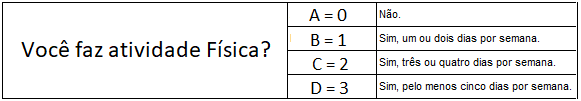

A   B   C   D   
1   0   0   0   
0   1   0   0   
0   0   1   0   
0   0   0   1


In [33]:
from sklearn.preprocessing import OneHotEncoder
from sklearn.compose import ColumnTransformer

In [34]:
previsores3 = ColumnTransformer(transformers=[('OneHot', OneHotEncoder(), [1,2,6,8,10])],
                                remainder='passthrough').fit_transform(previsores2)

In [35]:
previsores3

In [36]:
previsores3.shape

In [37]:
previsores3df = pd.DataFrame(previsores3)
previsores3df.head()

In [38]:
df.head()

## **Escalonamento**

In [39]:
from sklearn.preprocessing import StandardScaler

In [40]:
previsores3_esc = StandardScaler().fit_transform(previsores3)

In [41]:
previsores3_esc

In [42]:
previsores3df = pd.DataFrame(previsores3_esc)
previsores3df

In [43]:
previsores3df.describe()

## **RESUMO PRÉ-PROCESSAMENTO**

alvo = variável que se pretende atingir (tem ou não doença cardíaca).

previsores = conjunto de variáveis previsoras com as variáveis categóricas transformadas em numéricas manualmente, sem escalonar.

previsores_esc = conjunto de variáveis previsoras com as variáveis categóricas transformadas em numéricas, escalonada.

previsores2 = conjunto de variáveis previsoras com as variáveis categóricas transformadas em numéricas pelo labelencoder.

previsores3 = conjunto de variáveis previsoras transformadas pelo labelencoder e onehotencoder, sem escalonar.

previsores3_esc = conjunto de variáveis previsoras transformadas pelo labelencoder e onehotencoder escalonada.

# **98. Classificação com Redes Neurais Artificiais: criação do algoritmo**

## **BASE DE TREINO E TESTE**

In [100]:
from sklearn.model_selection import train_test_split

In [101]:
x_treino, x_teste, y_treino, y_teste = train_test_split(previsores_esc, alvo, test_size = 0.3, random_state = 0)

In [102]:
x_treino.shape

In [103]:
x_teste.shape

In [104]:
y_treino.shape

In [105]:
y_teste.shape

# **CRIAÇÃO DO ALGORITMO**

In [106]:
from sklearn.neural_network import MLPClassifier

In [57]:
MLPClassifier?

Parâmetros MLPClassifier   
- hidden_layer_sizes (camadas escondidas): default (100,)   

  Quant.= (Ne+Ns)/2 = (11+1)/2 = 6 neurônios   
  Quant.=2/3.(Ne) + Ns = 2/3.11+1 = 8 neurônios
- activation: Função de ativação default='relu' 
- solver: algoritmo matemático. Default='adam' (datasets grandes = acima de 1000 amostras). lbfgs é para datasets pequenos. sgd é com a descida do gradiente estocástico (recomendado testar).
- alpha:  parâmetro para o termo de regularização de ajuste de pesos. Aumento de alpha estimula pesos menores e diminuição de alpha estimula pesos maiores. Default=0.0001.
- batch_size: tamanho dos mini lotes. default=min(200, n_samples). Não usar com o solver lbfgs.
- learning_rate: taxa de aprendizagem. default='constant'. Três tipos:   
  1- 'constant':uma taxa de aprendizado constante dada pela taxa de aprendizagem inicial.   
  2- 'invscaling': diminui gradualmente por: taxa efetiva = taxa inicial / t^power_t  
  3- 'adaptive': a taxa é dividida por 5 cada vez que em duas épocas consecutivas não diminuir o erro.
- learning_rate_init: taxa de aprendizagem inicial. Default=0.001
- max_iter int: Número máximo de iterações. default = 200.  ('sgd', 'adam').
- max_fun: Número máximo de chamadas de função de perda. Para 'lbfgs'. Default: 15000
- shuffle: default = True
Usado apenas quando solver = 'sgd' ou 'adam'.
- random_state: default = None
- tol:Tolerância para a otimização.Default=0.0001
- momentum: otimização do algoritmo 'sgd'. Default: 0.9.
- n_iter_no_change: Número máximo de épocas que não atinge a tolerância de melhoria. default = 10. Apenas para solver = 'sgd' ou 'adam'
- verbose : Mostra o progresso. default=False.



In [107]:
redes = MLPClassifier(hidden_layer_sizes=(7), activation='relu', solver='adam', max_iter =800,
                              tol=0.0001, random_state = 3, verbose = True)

In [108]:
redes.fit(x_treino, y_treino)

In [109]:
previsoes = redes.predict(x_teste)

In [110]:
previsoes

In [111]:
from sklearn.metrics import accuracy_score, confusion_matrix, classification_report

In [112]:
print("Acurácia: %.2f%%" % (accuracy_score(y_teste, previsoes) * 100.0))

In [113]:
confusion_matrix(y_teste, previsoes)

In [114]:
print(classification_report(y_teste, previsoes))

**Análise dados de treino**

In [115]:
previsoes_treino = redes.predict(x_treino)
previsoes_treino

In [116]:
accuracy_score(y_treino, previsoes_treino)

In [117]:
confusion_matrix(y_treino, previsoes_treino)

### **Validação Cruzada**

In [118]:
from sklearn.model_selection import KFold
from sklearn.model_selection import cross_val_score

In [119]:
# Separando os dados em folds
kfold = KFold(n_splits = 30, shuffle=True, random_state = 5)

In [120]:
# Criando o modelo
modelo = MLPClassifier(hidden_layer_sizes=(7), activation='relu', solver='adam', max_iter=800,
                              tol=0.0001, random_state = 3, verbose = True)
resultado = cross_val_score(modelo, previsores, alvo, cv = kfold)
print("Acurácia Média: %.2f%%" % (resultado.mean() * 100.0))

Naive Bayes = 84,78% (treino e teste) - 234 acertos e 85,17% (validação cruzada) : previsores3_esc

SVM = 86,23% - 238 acertos e 85,72% (validação cruzada) : previsores3-esc - SVC(kernel='rbf', random_state=1, C = 2)

Regressão logística = 86,23% - 238 acertos e 85,83% (validação cruzada) : previsores3_esc - LogisticRegression(random_state=1, max_iter=600, penalty="l2", tol=0.0001, C=1,solver="lbfgs")

KNN = 84,06% - 232 acertos e 85,84% (validação cruzada) : previsores3_esc ou previsores_esc - KNeighborsClassifier(n_neighbors=7, metric='minkowski', p = 1)

Árvore de decisão = 83,7% (treino e teste) - 231 acertos e 83,32% (validação cruzada): previsores3_esc - DecisionTreeClassifier(criterion='entropy', random_state = 0, max_depth=3)

Random Forest = 86,59% - 239 acertos e 85,92% (validação cruzada) : previsores - RandomForestClassifier(n_estimators=150, criterion='entropy', random_state = 0, max_depth=4)

**XGboost = 87,68% - 242 acertos e 87,13% (validação cruzada) : previsores - XGBClassifier(max_depth=2, learning_rate=0.05, n_estimators=250, objective='binary:logistic', random_state=3)**

LightGBM = 86,23% (treino e teste)- 238 acertos e 85,93% (validação cruzada) : previsores - lgb.LGBMClassifier(num_leaves = 250, objective = 'binary',  max_depth = 2, learning_rate = .05, max_bin =100)

CatBoost = 86,96% (treino e teste) previsores4 - 240 acertos e 88% (validação cruzada com previsores) - CatBoostClassifier(task_type='CPU', iterations=100, learning_rate=0.1, depth = 8, random_state = 5, eval_metric="Accuracy")

Redes Neurais Artificiais = 86,23% (treino e teste) - 238 acertos e 83,97% (validação cruzada) : previsores_esc - MLPClassifier(hidden_layer_sizes=(7), activation='relu', solver='adam', max_iter=800, tol=0.0001, random_state = 3, verbose = True)

# **DESAFIO 3**

DESENVOLVER UM ALGORITMO DE REDES NEURAIS ARTFICIAIS DE CLASSIFICAÇÃO PARA O DATASET DO LINK A SEGUIR:

https://www.kaggle.com/uciml/breast-cancer-wisconsin-data 